In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
url='https://raw.githubusercontent.com/MeraLuis/Airlines-delays/main/Flight%20Delays.csv'
df= pd.read_csv(url, sep=',')
data = pd.read_csv(url)
df.head(10)


,Year,Month,Day,DayOfWeek,Flight_Date,UniqueCarrier,Origin_Airport,Scheduled_Departure,Departure_Time,Dep_Delay,...,Distance,DistanceGroup,Carrier_Delay,WeatherDelay,NAS_Delay,Security_Delay,Late_Aircraft_Delay,DEPTIME_GROUP1,DEPTIME_GROUP2,DEPTIME_GROUP3
0,2017,5,15,1,15/05/2017,DL,DFW,1605,1600,-5,...,731,3,0,0,0,0,0,1200-1800,1400-1600,1500-1600\r
1,2017,5,15,1,15/05/2017,DL,MSP,700,656,-4,...,1276,6,0,0,0,0,0,0600-1200,0600-0800,0600-0700\r
2,2017,5,15,1,15/05/2017,DL,ATL,2147,2147,0,...,350,2,0,0,0,0,0,1800-2359,2000-2200,2100-2200\r
3,2017,5,15,1,15/05/2017,DL,MSP,1756,1757,1,...,1276,6,0,0,0,0,0,1200-1800,1600-1800,1700-1800\r
4,2017,5,15,1,15/05/2017,DL,DEN,600,646,46,...,1199,5,26,0,0,0,0,0600-1200,0600-0800,0600-0700\r
5,2017,5,15,1,15/05/2017,DL,ATL,2129,2126,-3,...,143,1,0,0,0,0,0,1800-2359,2000-2200,2100-2200\r
6,2017,5,15,1,15/05/2017,DL,ATL,811,807,-4,...,432,2,0,0,0,0,0,0600-1200,0800-1000,0800-0900\r
7,2017,5,15,1,15/05/2017,DL,ATL,813,811,-2,...,321,2,0,0,0,0,0,0600-1200,0800-1000,0800-0900\r
8,2017,5,15,1,15/05/2017,DL,BOS,1647,1641,-6,...,632,3,0,0,0,0,0,1200-1800,1600-1800,1600-1700\r
9,2017,5,15,1,15/05/2017,DL,ATL,1515,1510,-5,...,646,3,0,0,0,0,0,1200-1800,1400-1600,1500-1600\r


**HIPÓTESIS**
* ¿Puede la frecuencia de vuelos programados por aeropuerto influir en la cantidad de vuelos demorados que presente?
Hipoótesis: Algunos aeropuertos, en relación a la cantidad de vuelos programados, tienden a presentar mas demoras que otros
* ¿Influye el horario de partida programado en las demoras?
Hipótesis: Los vuelos que operan en determinada franja horaria son mas propensos a sufrir demoras.
* ¿Existe realción entre demoras al arribo y la distancia recorrida?
Hipótesis: En los vuelos que recorren una mayor distancia se puede observar una menor cantidad de demoras al arribo.

**Hipótesis 1**

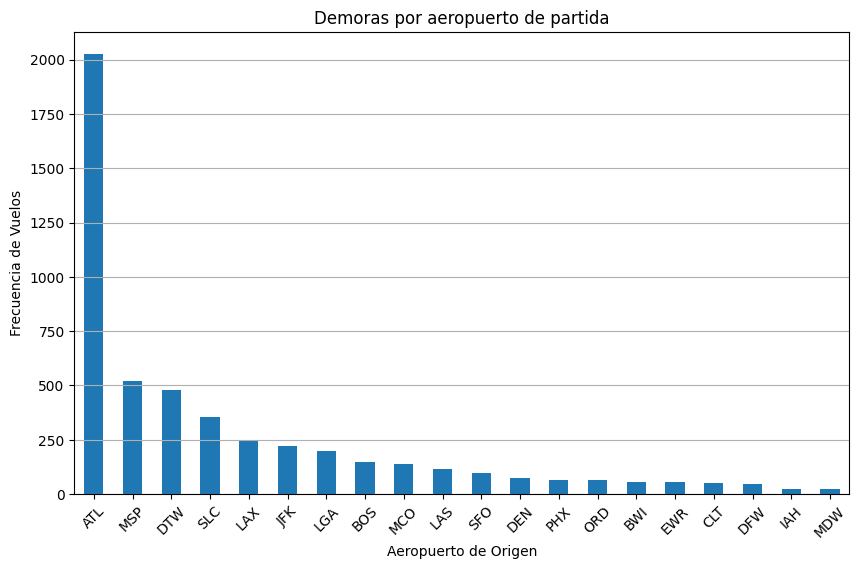

In [2]:
origin_counts = data['Origin_Airport'].value_counts()
plt.figure(figsize=(10, 6))
origin_counts.plot(kind='bar')
plt.title('Demoras por aeropuerto de partida')
plt.xlabel('Aeropuerto de Origen')
plt.ylabel('Frecuencia de Vuelos')
plt.xticks(rotation=45)
plt.grid(axis='y')

<ipython-input-3-b07fe1025bd6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=origin_counts, x='Origin_Airport', y='Number_of_Flights', palette='viridis')


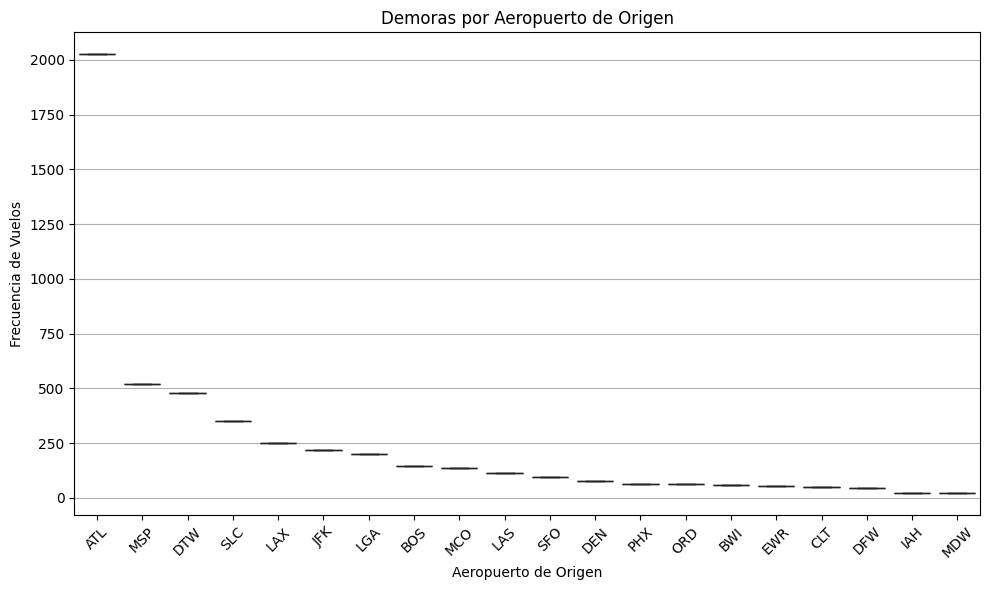

In [3]:
plt.figure(figsize=(10, 6))
origin_counts = data['Origin_Airport'].value_counts().reset_index()
origin_counts.columns = ['Origin_Airport', 'Number_of_Flights']
sns.boxplot(data=origin_counts, x='Origin_Airport', y='Number_of_Flights', palette='viridis')
plt.title('Demoras por Aeropuerto de Origen')
plt.xlabel('Aeropuerto de Origen')
plt.ylabel('Frecuencia de Vuelos')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Del gráfico podemos observar una marcada frecuencia de vuelos partiendo del aeropuerto de Atlanta, seguido por el aeropuerto de Minneapolis. El resto de los aeropuertos presentan una frecuencia similar por lo que, para el análisis de la hipótesis planteada podemos verificar si en los dos primeros aeropuertos mencionados se produce la mayor cantidad de demoras puede deberse a una mayor programacion de vuelos.

**Hipótesis 2**

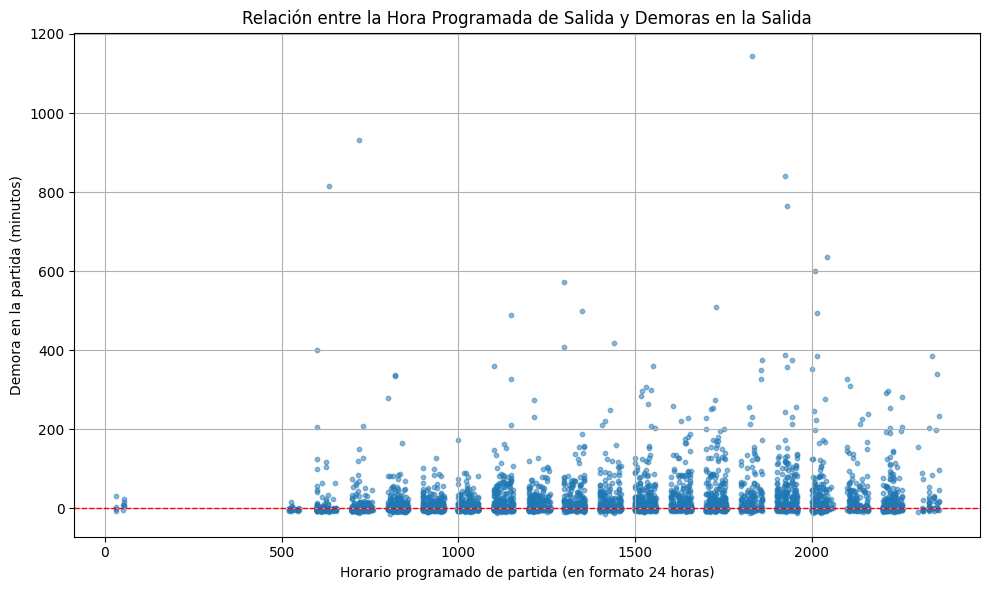

In [4]:
data['Scheduled_Departure'] = pd.to_numeric(data['Scheduled_Departure'], errors='coerce')
data['Dep_Delay'] = pd.to_numeric(data['Dep_Delay'], errors='coerce')
plt.figure(figsize=(10, 6))
plt.scatter(data['Scheduled_Departure'], data['Dep_Delay'], alpha=0.5, s=10)
plt.title('Relación entre la Hora Programada de Salida y Demoras en la Salida')
plt.xlabel('Horario programado de partida (en formato 24 horas)')
plt.ylabel('Demora en la partida (minutos)')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.grid()
plt.tight_layout()
plt.show()

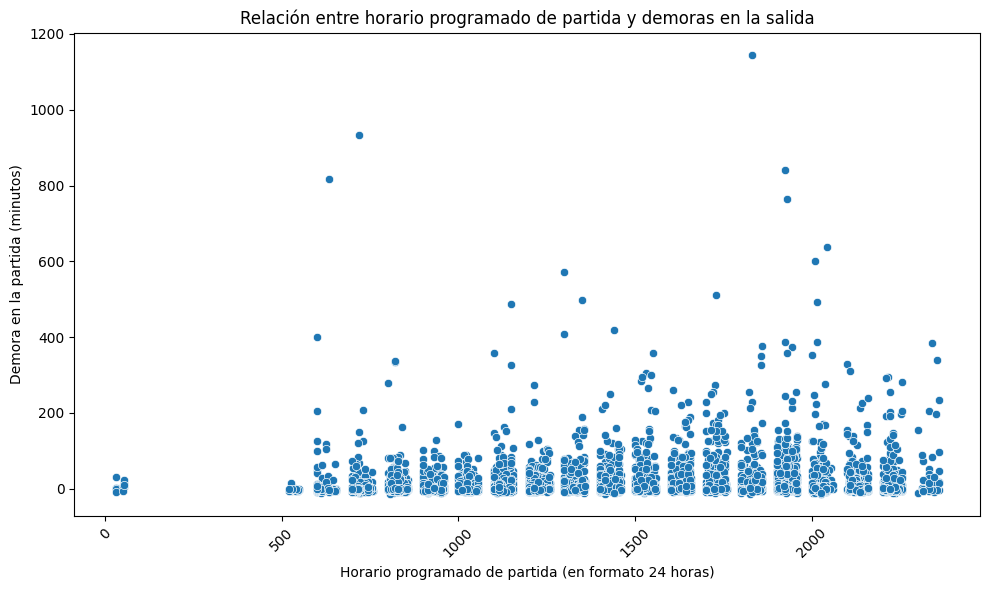

In [5]:

data = data.dropna(subset=['Scheduled_Departure', 'Dep_Delay'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Scheduled_Departure', y='Dep_Delay', data=data)
plt.title('Relación entre horario programado de partida y demoras en la salida')
plt.xlabel('Horario programado de partida (en formato 24 horas)')
plt.ylabel('Demora en la partida (minutos)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


En el gráfico observamos que las demoras tienden a concentrarse de forma pareja a lo largo del día por lo que podemos decir que no influye de manera significativa el horario programado del vuelo


**Hipótesis 2**


<ipython-input-6-9d617a6dece6>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(distance_bins)['Arrival_Delay'].mean().reset_index()


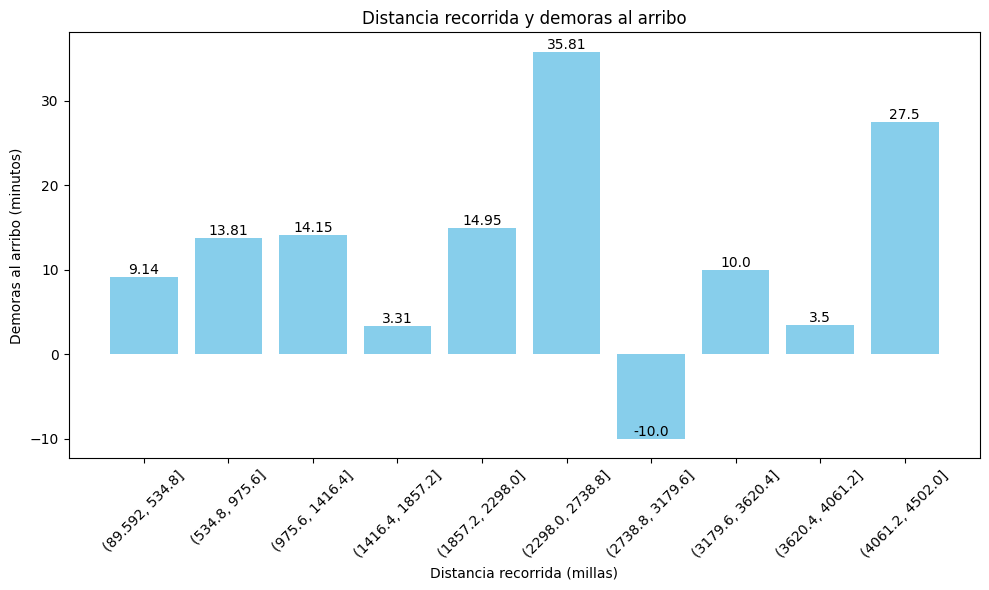

In [6]:
data['Arrival_Delay'] = pd.to_numeric(data['Arrival_Delay'], errors='coerce')
data['Distance'] = pd.to_numeric(data['Distance'], errors='coerce')
data = data.dropna(subset=['Arrival_Delay', 'Distance'])
distance_bins = pd.cut(data['Distance'], bins=10)
grouped_data = data.groupby(distance_bins)['Arrival_Delay'].mean().reset_index()
plt.figure(figsize=(10, 6))
bars = plt.bar(grouped_data['Distance'].astype(str), grouped_data['Arrival_Delay'], color='skyblue')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.title('Distancia recorrida y demoras al arribo')
plt.xlabel('Distancia recorrida (millas)')
plt.ylabel('Demoras al arribo (minutos)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


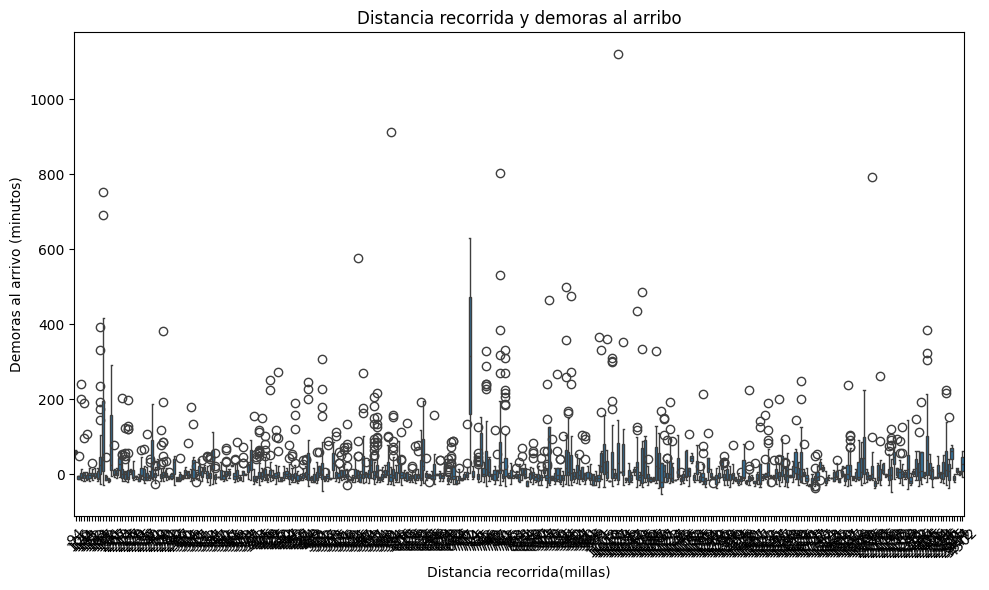

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Distance', y='Arrival_Delay', data=data)
plt.title('Distancia recorrida y demoras al arribo')
plt.xlabel('Distancia recorrida(millas)')
plt.ylabel('Demoras al arrivo (minutos)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Podemos observar que no exixte relación significativa entre la distancia recorrida y la demora al arribo ya que muy pocos vuelos con mayor distancia recorrida presentan menos demora al arribo por lo que la hipótesis puede ser descartada.

# **ENTREGA FINAL**





##**OBJETIVO DEL ANALISIS**:
Identificar los factores que contribuyen a una mayor eficiencia operativa de los vuelos, con el fin de reducir las demoras en la llegada y mejorar la experiencia de los pasajeros.
###Preguntas Claves
* ¿Puede la frecuencia de vuelos programados por aeropuerto influir en la cantidad de vuelos demorados que presente?
Hipoótesis: Algunos aeropuertos, en relación a la cantidad de vuelos programados, tienden a presentar mas demoras que otros
* ¿Influye el horario de partida programado en las demoras?
Hipótesis: Los vuelos que operan en determinada franja horaria son mas propensos a sufrir demoras.
* ¿Existe realción entre demoras al arribo y la distancia recorrida?
Hipótesis: En los vuelos que recorren una mayor distancia se puede observar una menor cantidad de demoras al arribo.


#*Contexto comercial*

Una aerolínea que busca optimizar sus operaciones para:

*Reducir costos: Las demoras en los vuelos generan costos
adicionales para las aerolíneas, como el combustible adicional quemado mientras se espera para despegar o aterrizar, compensaciones a los pasajeros por vuelos retrasados o cancelados, y costos operativos adicionales debido a la interrupción de los horarios.

*Mejorar la satisfacción del cliente: Las demoras en los vuelos pueden generar frustración e insatisfacción en los pasajeros. Al reducir las demoras, la aerolínea o el aeropuerto pueden mejorar la experiencia del cliente y fomentar la lealtad a la marca.

*Aumentar la eficiencia operativa: La identificación de los factores que contribuyen a las demoras puede permitir a la aerolínea o al aeropuerto implementar medidas para optimizar sus operaciones, como ajustar los horarios de los vuelos, mejorar la gestión del tráfico aéreo o invertir en infraestructura.

*Obtener una ventaja competitiva: Al ofrecer un servicio más puntual y eficiente, la aerolínea o el aeropuerto pueden diferenciarse de sus competidores y atraer a más clientes.


##*Problema Comercial*

La aerolínea deberá identificar los factores que inluyen en que los vuelos se demoren y todos los problemas que esto desencadena.

¿Cómo puede la aerolínea minimizar las demoras en los vuelos y optimizar sus operaciones para reducir costos, mejorar la satisfacción del cliente y obtener una ventaja competitiva?

##*Contexto Analítico*


Para el caso es prudente analizar las variables relevantes en el conjunto de datos para identificar patrones y relaciones que puedan explicar las demoras en los vuelos. Esto nos permitirá obtener información procesable para la aerolínea.

Consideraremos las variables que puedan influir en las demoras o que puedan ser utilizadas para segmentar los vuelos y analizar el problema desde diferentes perspectivas.

Las variables claves para este conjunto de datos son:

*Variables relacionadas con las demoras:

Arrival_Delay (variable objetivo principal)


Carrier_Delay, WeatherDelay, NAS_Delay, Security_Delay, Late_Aircraft_Delay (brindan infornacion acerca del motivo de demora)

*Variables para segmentación y análisis:


Origin_Airport (para saber su localización)

Distance (nos permite saber cuán largo será el vuelo)

DistanceGroup (para segmentar por longitud de vuelo)

DEPTIME_GROUP1, DEPTIME_GROUP2, DEPTIME_GROUP3 (segmenta en franja horaria de vuelos)

#Analisis EDA

In [10]:
# Mostrar las primeras filas del dataset
print(data.head())

   Year  Month  Day  DayOfWeek Flight_Date UniqueCarrier Origin_Airport  \
0  2017      5   15          1  15/05/2017            DL            DFW   
1  2017      5   15          1  15/05/2017            DL            MSP   
2  2017      5   15          1  15/05/2017            DL            ATL   
3  2017      5   15          1  15/05/2017            DL            MSP   
4  2017      5   15          1  15/05/2017            DL            DEN   

   Scheduled_Departure  Departure_Time  Dep_Delay  ...  Distance  \
0                 1605            1600         -5  ...       731   
1                  700             656         -4  ...      1276   
2                 2147            2147          0  ...       350   
3                 1756            1757          1  ...      1276   
4                  600             646         46  ...      1199   

   DistanceGroup  Carrier_Delay  WeatherDelay  NAS_Delay  Security_Delay  \
0              3              0             0          0        

In [11]:
# Dimensiones del dataset
print("Dimensiones del dataset:", data.shape)

Dimensiones del dataset: (5000, 24)


##Análisis Descriptivo


In [12]:
# Tipos de datos
print("Tipos de datos en el dataset:")
print(data.dtypes)

Tipos de datos en el dataset:
Year                    int64
Month                   int64
Day                     int64
DayOfWeek               int64
Flight_Date            object
UniqueCarrier          object
Origin_Airport         object
Scheduled_Departure     int64
Departure_Time          int64
Dep_Delay               int64
DepDel15                int64
Scheduled_Arrival       int64
Arrival_Delay           int64
Arr_Del_morethan15      int64
Distance                int64
DistanceGroup           int64
Carrier_Delay           int64
WeatherDelay            int64
NAS_Delay               int64
Security_Delay          int64
Late_Aircraft_Delay     int64
DEPTIME_GROUP1         object
DEPTIME_GROUP2         object
DEPTIME_GROUP3         object
dtype: object


In [13]:
# Estadísticas descriptivas para variables numéricas
print("Estadísticas descriptivas para variables numéricas:")
print(data.describe())

Estadísticas descriptivas para variables numéricas:
         Year   Month          Day    DayOfWeek  Scheduled_Departure  \
count  5000.0  5000.0  5000.000000  5000.000000          5000.000000   
mean   2017.0     5.0    23.757400     3.842400          1413.032800   
std       0.0     0.0     3.807498     1.381573           488.489816   
min    2017.0     5.0    15.000000     1.000000            30.000000   
25%    2017.0     5.0    24.000000     3.000000           959.000000   
50%    2017.0     5.0    25.000000     4.000000          1416.000000   
75%    2017.0     5.0    26.000000     5.000000          1825.000000   
max    2017.0     5.0    27.000000     6.000000          2359.000000   

       Departure_Time    Dep_Delay     DepDel15  Scheduled_Arrival  \
count     5000.000000  5000.000000  5000.000000        5000.000000   
mean      1409.885600    17.524800     0.258400        1559.130400   
std        512.671093    55.063968     0.437799         521.216418   
min          1.0000

In [16]:
# Frecuencias para variables categóricas
print("Frecuencias para las variables categóricas:")
print(data['DEPTIME_GROUP1'].value_counts())
print(data['DEPTIME_GROUP2'].value_counts())
print(data['DEPTIME_GROUP3'].value_counts())
print(data['Flight_Date'].value_counts())
print(data['Origin_Airport'].value_counts())
print(data['UniqueCarrier'].value_counts() )

Frecuencias para las variables categóricas:
DEPTIME_GROUP1
1200-1800    1742
0600-1200    1741
1800-2359    1385
0000-0600     132
Name: count, dtype: int64
DEPTIME_GROUP2
0800-1000    754
1600-1800    609
1400-1600    586
1000-1200    577
2000-2200    555
1200-1400    547
1800-2000    504
0600-0800    410
2200-2359    326
0400-0600     66
0000-0200     54
0200-0400     12
Name: count, dtype: int64
DEPTIME_GROUP3
0800-0900\r    401
0900-1000\r    353
1500-1600\r    333
1700-1800\r    314
2000-2100\r    305
1100-1200\r    297
1600-1700\r    295
1900-2000\r    294
1000-1100\r    280
1200-1300\r    280
1300-1400\r    267
1400-1500\r    253
2100-2200\r    250
0700-0800\r    248
2200-2300\r    239
1800-1900\r    210
0600-0700\r    162
2300-2359\r     87
0500-0600\r     65
0000-0100\r     35
0100-0200\r     19
0200-0300\r      7
0300-0400\r      5
0400-0500\r      1
Name: count, dtype: int64
Flight_Date
26/05/2017    1835
25/05/2017    1813
15/05/2017     775
24/05/2017     484
27/05/2017   

##Visualización de Datos

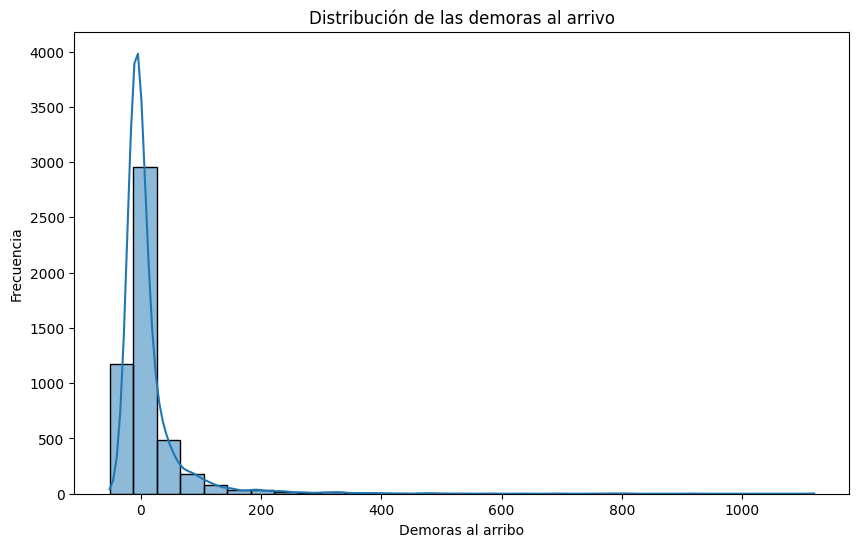

In [17]:
# Histograma de la variable 'Arrival_Delay'
plt.figure(figsize=(10, 6))
sns.histplot(data['Arrival_Delay'], bins=30, kde=True)
plt.title('Distribución de las demoras al arrivo')
plt.xlabel('Demoras al arribo')
plt.ylabel('Frecuencia')
plt.show()

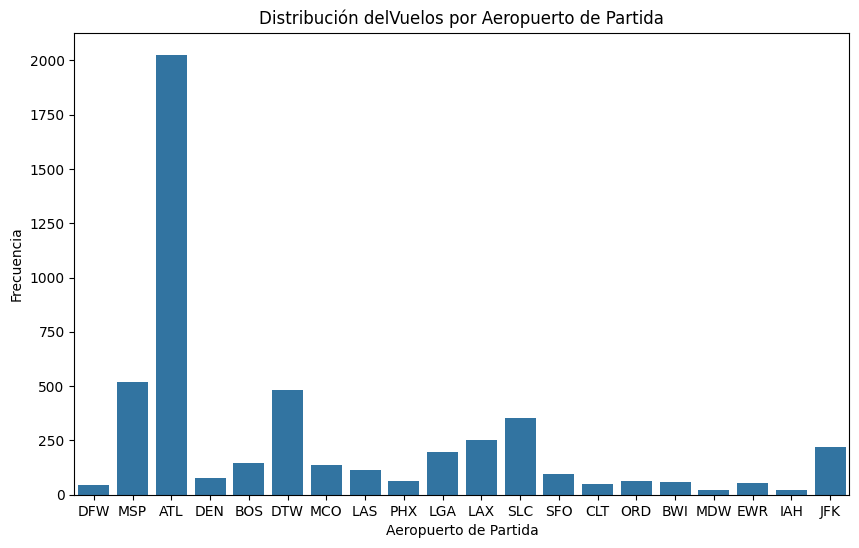

In [18]:
# Gráfico de barras para la variable 'Origin_Airport'
plt.figure(figsize=(10, 6))
sns.countplot(x='Origin_Airport', data=data)
plt.title('Distribución delVuelos por Aeropuerto de Partida')
plt.xlabel('Aeropuerto de Partida')
plt.ylabel('Frecuencia')
plt.show()

##Tratamiento de Datos Faltantes o Erróneos

```
# This is formatted as code
```



In [32]:
# Identificar valores nulos
print("Valores nulos en el dataset:")
print(data.isnull().sum())

# Tratamiento de outliers para 'Arrival_Delay' (ejemplo usando IQR)
Q1 = data['Arrival_Delay'].quantile(0.25)
Q3 = data['Arrival_Delay'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aplicar filtro para eliminar outliers
data_filtered = data[(data['Arrival_Delay'] >= lower_bound) & (data['Arrival_Delay'] <= upper_bound)]
print("Datos después de filtrar outliers en Demoras al Arrivo:", data_filtered.shape)

Valores nulos en el dataset:
Year                   0
Month                  0
Day                    0
DayOfWeek              0
Flight_Date            0
UniqueCarrier          0
Origin_Airport         0
Scheduled_Departure    0
Departure_Time         0
Dep_Delay              0
DepDel15               0
Scheduled_Arrival      0
Arrival_Delay          0
Arr_Del_morethan15     0
Distance               0
DistanceGroup          0
Carrier_Delay          0
WeatherDelay           0
NAS_Delay              0
Security_Delay         0
Late_Aircraft_Delay    0
DEPTIME_GROUP1         0
DEPTIME_GROUP2         0
DEPTIME_GROUP3         0
dtype: int64
Datos después de filtrar outliers en Demoras al Arrivo: (4485, 24)


##Selección del Feature

Primero aplicamos los ajustes necesarios para poder realizar un análisis completo de los datos.

Para ello debemos convertir variables categóricas en formatos numéricos ya que excluirlas puede significar perder información valiosa para nuestro análisis

In [35]:
# Convertir variables categóricas en dummies
data_encoded = pd.get_dummies(data, drop_first=True)

In [36]:
# Calcular la matriz de correlación para datos con variables categóricas codificadas
correlation_matrix = data_encoded.corr()

In [45]:
# Visualizar la correlación con la variable respuesta 'Arrival_Delay'
response_correlation = correlation_matrix['Arrival_Delay'].sort_values(ascending=False)

) missing from current font.
  fig.canvas.draw()
) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


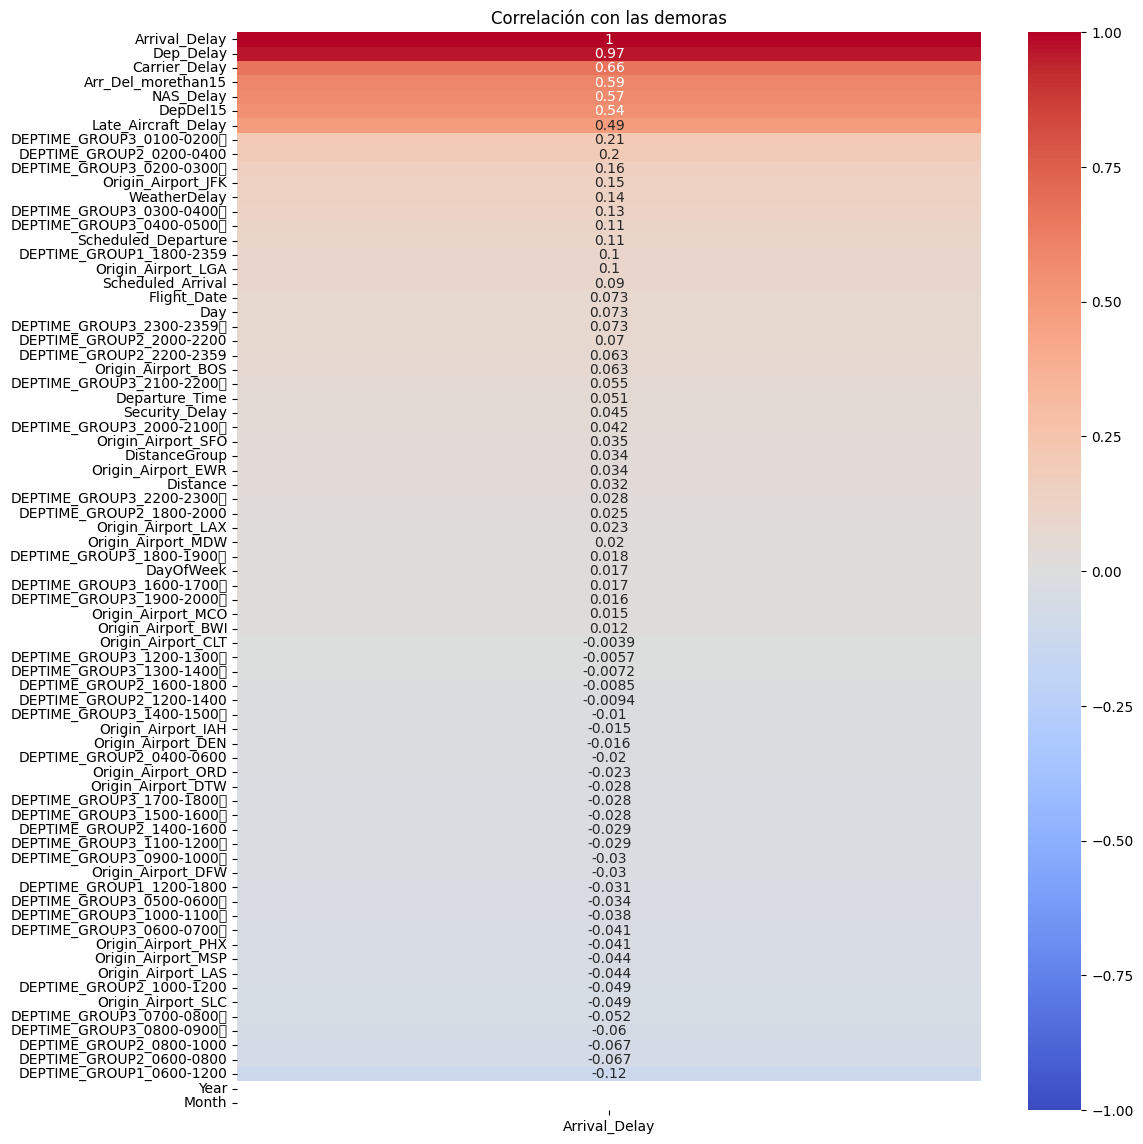

In [49]:
# Creamos un heatmap
plt.figure(figsize=(12, 14))
sns.heatmap(response_correlation.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlación con las demoras')
plt.show()

De la vizualización podemos interpretar las siguientes correlaciones:

- Arrival_Delay y Dep_Delay tienen una correlación muy alta (0.97), lo que indica que las demoras en la salida están fuertemente asociadas con las demoras en la llegada. Esto es lógico, ya que un vuelo que sale tarde tiene más probabilidades de llegar tarde también.

- Las demoras atribuibles a la aerolínea (Carrier_Delay) y al sistema de control de tráfico aéreo (NAS_Delay) también tienen una correlación moderada con Arrival_Delay (0.66 y 0.57, respectivamente). Esto sugiere que estos factores son contribuyentes significativos a las demoras en la llegada.

- Late_Aircraft_Delay también muestra una correlación moderada con Arrival_Delay (0.49), lo que indica que los retrasos debidos a aeronaves que llegan tarde también son un factor importante
WeatherDelay y Security_Delay tienen correlaciones más bajas con Arrival_Delay (0.14 y 0.045, respectivamente), lo que sugiere que estos factores tienen un impacto menor en las demoras en la llegada en este conjunto de datos.

- Distance tiene una correlación muy baja con Arrival_Delay (0.032), lo que indica que, en este conjunto de datos, la distancia del vuelo no está fuertemente asociada con la demora en la llegada. Esto podría contradecir la tercera hipótesis planteada anteriormente.

Validamos la correlación con el Índice de correlación de pearson

In [50]:
from scipy.stats import pearsonr

# Listado de columnas numericas relevantes
relevant_columns = ['Arrival_Delay', 'Dep_Delay', 'Distance',
                    'Carrier_Delay', 'WeatherDelay', 'NAS_Delay',
                    'Security_Delay', 'Late_Aircraft_Delay']

# Filtrar el dataframe para incluir solo estas columnas
filtered_df = df[relevant_columns]

# Calculo del coeficiente de pearson
correlations = {}
for col in relevant_columns[1:]:  # Excluye 'Arrival_Delay'
    corr, _ = pearsonr(filtered_df['Arrival_Delay'], filtered_df[col])
    correlations[col] = corr

# Ordenar correlaciones por valor absoluto en orden descendente
sorted_correlations = sorted(correlations.items(), key=lambda item: abs(item[1]), reverse=True)
print("Correlaciones de Pearson con Arrival_Delay:\n")
for col, corr in sorted_correlations:
    print(f"{col}: {corr:.3f}")

Correlaciones de Pearson con Arrival_Delay:

Dep_Delay: 0.968
Carrier_Delay: 0.664
NAS_Delay: 0.572
Late_Aircraft_Delay: 0.492
WeatherDelay: 0.139
Security_Delay: 0.045
Distance: 0.032


##Selección del Algoritmo adecuado

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [65]:
#Preprocesamiento de datos
# Eliminar las filas con valores nulos
df.dropna(inplace=True)
# Convertir variables categóricas en dummies
df_encoded = pd.get_dummies(df, drop_first=True)
# Convertimos 'Flight_Date' en datetime object
if 'Flight_Date' in data.columns:
    data['Flight_Date'] = pd.to_datetime(data['Flight_Date'])

# Extraer el 'Month' y el 'DayOfWeek' de la columna 'Flight_Date' y eliminar la columna original
data['Month'] = data['Flight_Date'].dt.month
data['DayOfWeek'] = data['Flight_Date'].dt.dayofweek
data.drop(columns=['Flight_Date'], inplace=True)
# Definir 'X' como todas las columnas excepto la variable objetivo 'Arrival_Delay' y 'y' como la columna 'Arrival_Delay'
X = df.drop('Arrival_Delay', axis=1)
y = df['Arrival_Delay']
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [71]:
# Crear y entrenar un modelo de LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
# Crear y entrenar un modelo de RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [70]:
# Realizar predicciones en el conjunto de prueba para ambos modelos
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Calcular el error cuadrático medio (MSE) y el coeficiente de determinación (R²) para ambos modelos en el conjunto de prueba
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Imprimir losresultados de MSE y R² para ambos modelos
print("Linear Regression - MSE:", mse_lr, "R²:", r2_lr)
print("Random Forest - MSE:", mse_rf, "R²:", r2_rf)

# 3. Selección del mejor modelo

# Comparar los valores de MSE y R² de ambos modelos
best_model = "Linear Regression" if mse_lr < mse_rf and r2_lr > r2_rf else "Random Forest"

# Imprimir el nombre del modelo con el mejor rendimiento
print("\nEl mejor modelo es:", best_model)

Linear Regression - MSE: 67.07375942568073 R²: 0.9801934217296997
Random Forest - MSE: 107.708318 R²: 0.9681942200780742

El mejor modelo es: Linear Regression


##Interpretación


Según la comparación de los valores del error cuadrático medio (MSE) y R cuadrado (R²), la regresión lineal parece ser el algoritmo más adecuado para este conjunto de datos. Tiene un MSE más bajo (67,07) y un R² más alto (0,980) en comparación con el modelo Random Forest, lo que indica un mejor rendimiento predictivo en el conjunto de prueba.

Con una precisión tan alta, el modelo podría ser una herramienta útil en la planificación y optimización de los horarios de los vuelos.

Consideraciones y Validaciones Adicionales

Es importante señalar que esta es sólo una evaluación inicial basada en una única división entre tren y prueba. Se recomienda realizar una validación cruzada u otras técnicas de remuestreo para obtener una estimación más sólida del rendimiento del modelo y confirmar la elección del mejor algoritmo.

Además, una mayor exploración y ajuste de los hiperparámetros para ambos modelos podría conducir a un mejor rendimiento. También podría resultar beneficioso considerar otros algoritmos de regresión, como la regresión de vectores de soporte o el aumento de gradiente, y comparar también su rendimiento.

Aunque la regresión lineal parece ser el algoritmo más adecuado según la evaluación inicial, se recomienda realizar más experimentación y ajustar el modelo para garantizar la selección del mejor modelo posible para predecir retrasos en las llegadas de vuelos y optimizar las operaciones de las aerolíneas.

##Conclusión

Para realizar el análisis del caso sobre factores que influyen en la demora de los vuelos se tuveiron en cuenta solo los factores significativos.

Como metodología se realizaron análisis de correlación para identificar y seleccionar características significativas basadas en su relación con las demoras en la partida de los vuelos.
También se implementaron un modelo de Regresión Lineal y un modelo de Árbol de Decisión para probar cuál sería más acertado, mostrando ambos alto rendimiento. Pero el modelo de Regresión Lineal mostró ser el algoritmo más adecuado para este conjunto de datos.

De los datos obtenidos podemos concluir lo siguiente:

- La demora en la salida (Dep_Delay) es el predictor más fuerte de la demora en la llegada. Esto sugiere que la puntualidad en la salida es crucial para garantizar la puntualidad en la llegada. La aerolínea debería centrarse en mejorar sus procesos de embarque, gestión de equipaje y mantenimiento para minimizar las demoras en la salida.

- Las demoras atribuibles a la aerolínea (Carrier_Delay) y al sistema de control de tráfico aéreo (NAS_Delay) también son factores importantes. La aerolínea debería trabajar en mejorar su gestión interna y colaborar con las autoridades de control de tráfico aéreo para reducir estas demoras.

- Los retrasos debidos a aeronaves que llegan tarde (Late_Aircraft_Delay) también contribuyen significativamente a las demoras en la llegada. La aerolínea podría considerar estrategias para mejorar la gestión de su flota y minimizar el impacto de los retrasos en cadena.

- Las demoras por condiciones meteorológicas (WeatherDelay) y de seguridad (Security_Delay) tienen un impacto menor en las demoras en la llegada en este conjunto de datos. Aunque estos factores están fuera del control directo de la aerolínea, es importante contar con planes de contingencia para minimizar su impacto cuando ocurran.

- La distancia del vuelo (Distance) no parece tener una relación lineal fuerte con la demora en la llegada en este conjunto de datos. Esto sugiere que otros factores, como la congestión del tráfico aéreo en los aeropuertos de origen y destino, podrían ser más relevantes que la distancia en sí misma.

- El aeropuerto de origen Atlanta (Origin_Airport_ATL) y las franjas horarias de salida específicas (DEPTIME_GROUP2_1200-1400 y DEPTIME_GROUP3_1300-1400) también aparecen como variables importantes. Esto indica que la aerolínea podría necesitar prestar especial atención a las operaciones en Atlanta y a los vuelos programados para salir en esos horarios específicos.

Estos resultados sugieren que la aerolínea puede tomar varias medidas para optimizar sus operaciones y minimizar las demoras en la llegada, tales como:

- Mejorar la puntualidad en la salida: Implementar procesos más eficientes de embarque, gestión de equipaje y mantenimiento para reducir las demoras en la salida.
- Optimizar la gestión interna: Identificar y abordar las causas de las demoras atribuibles a la aerolínea, como problemas de personal, mantenimiento o logística.
- Colaborar con las autoridades de control de tráfico aéreo: Trabajar en conjunto para mejorar la gestión del tráfico aéreo y reducir las demoras atribuibles al sistema.
- Mejorar la gestión de la flota: Implementar estrategias para minimizar el impacto de los retrasos en cadena y garantizar que las aeronaves estén disponibles a tiempo.
- Desarrollar planes de contingencia: Prepararse para eventos climáticos adversos y otros factores externos que puedan causar demoras.
- Analizar las operaciones en aeropuertos específicos y franjas horarias: Identificar las causas de las demoras en Atlanta y en los horarios de salida específicos, y tomar medidas para mejorar la eficiencia en estas áreas.

Al abordar estos factores clave, la aerolínea puede reducir significativamente las demoras en la llegada de los vuelos, lo que resultará en una mayor satisfacción del cliente, menores costos operativos y una ventaja competitiva en el mercado. De ahí la importancia de realizar análisis avanzados de datos.